In [1]:
import numpy as np
import fiducial as fid
import matplotlib.pyplot as plt
import utils as u
import Eg_cov as egcov
import joint_cov as jp
import pyccl.nl_pt as pt
import pyccl as ccl
import MG_funcs as mg

Check what happens to the linear scale cuts when you use a modified gravity theory.

Set up parameters etc

In [2]:
lens = 'DESI'
src = 'LSSTY10'
rp0_try = 1.6
Pimax=300.
#rp_bin_edges = np.logspace(np.log10(rp0), np.log10(50.), 11)
endfilename='_Jan2025_fR_Y10'
#rp_bin_c = u.rp_bins_mid(rp_bin_edges)
# Let's use the same cosmological parameters as Shadab's simulations:
h=0.69
OmB = 0.022/h**2

b1 = 2.33
#b2 = 0.9*(b1-1.0)**2-0.5 # From Fast-PT example notebook which says 
#'(this is a numerical fit to simulation k2Pnl1_regdata, but a relationship of this form is motivated in the spherical collapse picture'
#bs = -4.0/7.0*(b1-1.0) # The 'coevolution value' see Pandey et al. DES Y3 papers

# A_s designed to match sigma8 with other cosmological parameters
params = {'mu_0': 0., 'sigma_0':0., 'OmB':OmB, 'h':h, 'n_s':0.965, 'sigma8':0.82,'b':b1, 'OmM': 0.292, 'fR0' : 10**(-4), 'A_s':2.115 * 10**(-9), 'fR_n': 1, 'H0rc':1.0} 


In [3]:
# Figure out As corresponding to this sigma8 in LCDM and use.
cosmo_fid = ccl.Cosmology(Omega_c = params['OmM'] - params['OmB'], Omega_b = params['OmB'], h = params['h'], A_s = 2.115 * 10**(-9), n_s = params['n_s'], mu_0 = params['mu_0'], sigma_0 = params['sigma_0'])

sig8 = ccl.sigma8(cosmo_fid)
print(sig8)

0.8199671393753716


In [4]:
k = np.logspace(np.log10(0.03), 0, 1000)
MG_params = [0, 10**(-4), 1, 0, 0]

In [5]:
rp0 = 1.5

rp_bin_c_raw = np.loadtxt('../data_for_Danielle/test-HOD-PB00-z0.75-w1pz_cat-zRSD-model-5-gxm-sel-crossparticles-wtag-w1-rfact10-bin1-wp-logrp-pi-NJN-100.txt.upsilon')[:,0]
rp_bin_edges_raw = u.rp_bin_edges_log(rp_bin_c_raw)
#Cut below rp0 making sure rp0 is in the lowest bin. Go one bin lower because this 
ind = next(j[0] for j in enumerate(rp_bin_edges_raw) if j[1]>rp0)-1
rp_bin_c = rp_bin_c_raw[ind:]
rp_bin_edges = rp_bin_edges_raw[ind:]

print('rp bin c=', rp_bin_c)
print('rp bin edges=', rp_bin_edges)

rp bin c= [ 1.39357881  1.83709466  2.42176242  3.19250463  4.20854074  5.54793718  7.31360558  9.64120984 12.70958983 16.75450244 22.08673575 29.11598823 38.38234769 50.59778848 66.70087562 87.92887875]
rp bin edges= [  1.21375641   1.60004256   2.10926689   2.78055529   3.66548575   4.83205129   6.36988417   8.39714273  11.06958999  14.5925616   19.23674266  25.35896564  33.42962733  44.0688315   58.09403408  76.5828519  100.95586057]


Get data covariance matrices for E_G and the joint probes case.

In [6]:
#Dcov_jp = jp.get_joint_covariance(params, lens, src, rp_bin_edges, rp_bin_c, rp0, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_jp_'+endfilename+'.txt', Dcov_jp)
Dcov_jp = np.loadtxt('../txtfiles/sims_cov_myunits_wSN_Jan25_LSSTY10.dat')

In [7]:
#Dcov_eg = egcov.get_egcov(params, rp_bin_edges, rp_bin_c, rp0, lens, src, Pimax, Nsamps, endfilename)
#np.savetxt('/home/danielle/Documents/CMU/Research/EG_comparison/txtfiles/Dcov_eg_'+endfilename+'.txt', Dcov_eg)
Dcov_eg = np.loadtxt('../txtfiles/sims_egcov_myunits_wSN_Jan25_LSSTY10.txt')

In [8]:
# Visualise the inverse covariance to understand the cuts:
inv_cov_eg = np.linalg.pinv(Dcov_eg)

Get the linear and nonlinear datavector for E_G

In [9]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False, MG=True, MGtheory='fR')

getting Upgg
getting Upgm
maxchi= 6669.353003473356


In [10]:
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=False, MG=True, MGtheory='fR')

getting Upgg
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)
getting Upgm
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167.

In [11]:
klin, Pk_lin = np.loadtxt('./Pklin_fR.dat', unpack=True)
knl, Pk_nl = np.loadtxt('./Pknl_fR.dat', unpack=True)

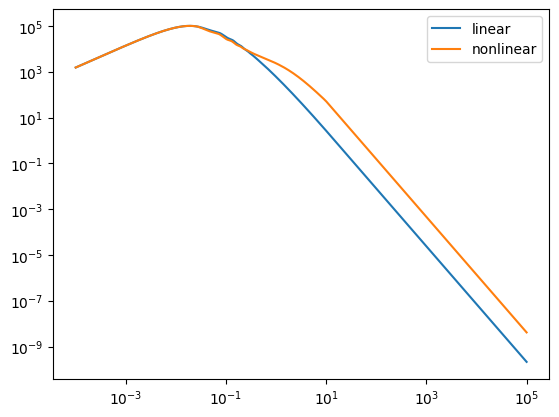

In [12]:
plt.figure()
plt.loglog(klin, Pk_lin, label='linear')
plt.loglog(knl, Pk_nl, label='nonlinear')
plt.legend()
plt.show()

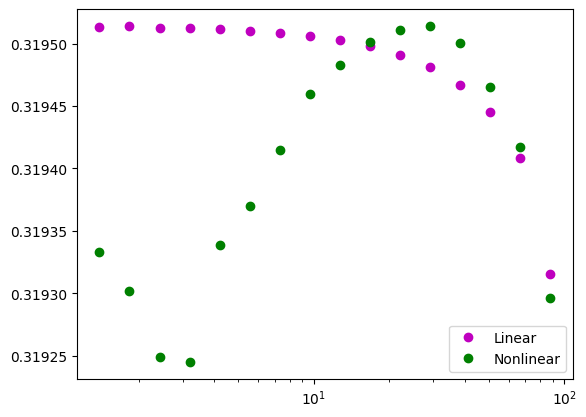

In [10]:
plt.figure()
plt.semilogx(rp_bin_c, data_lin_EG, 'mo', label='Linear')
plt.semilogx(rp_bin_c, data_nl_EG, 'go', label='Nonlinear')
plt.legend()
plt.show()

In [22]:
data_nl_EG

array([0.16004442, 0.16051902, 0.15497383, 0.15499368, 0.15641298, 0.15640504, 0.15675853, 0.1567622 , 0.15765298, 0.15723639, 0.1568611 , 0.15700246, 0.15726022, 0.15742004,        nan])

Get scale cuts for Eg

In [11]:
cut_inds_Eg = u.linear_scale_cuts_hartlap(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c, covsamps=100)

chi2_in= 0.1991577021291832 , no cuts


In [12]:
print("cut indices=", cut_inds_Eg)

cut indices= []


Now get the linear and nonlinear data vectors for the joint probes case

In [13]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False, MG=True, MGtheory='fR')
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=False, MG=True, MGtheory='fR')

maxchi= 6669.353003473356
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167... done.
Training the emulator at aexp=0.4444... done.
Training the emulator at aexp=0.4762... done.
Training the emulator at aexp=0.5000... done.
Training the emulator at aexp=0.5263... done.
Training the emulator at aexp=0.5556... done.
Training the emulator at aexp=0.5882... done.
Training the emulator at aexp=0.6250... done.
Training the emulator at aexp=0.6667... done.
Training the emulator at aexp=0.7042... done.
Training the emulator at aexp=0.7692... done.
Training the emulator at aexp=0.8000... done.
Training the emulator at aexp=0.8696... done.
Training the emulator at aexp=0.9091... done.
Training the emulator at aexp=0.9524... done.
Training the emulator at aexp=1.0000... done.
pk_ratio_reshape shape= (50, 11238)
Pk_nl shape= (50, 11238)
shape of ratio= 50
shape Pk_return= (50, 40000)
Training the emulator at aexp=0.4000... done.
Training the emulator at aexp=0.4167.

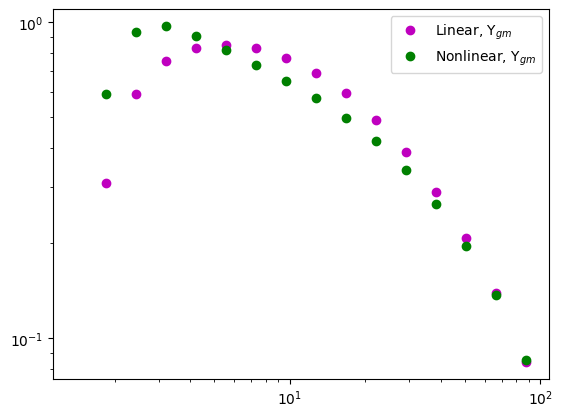

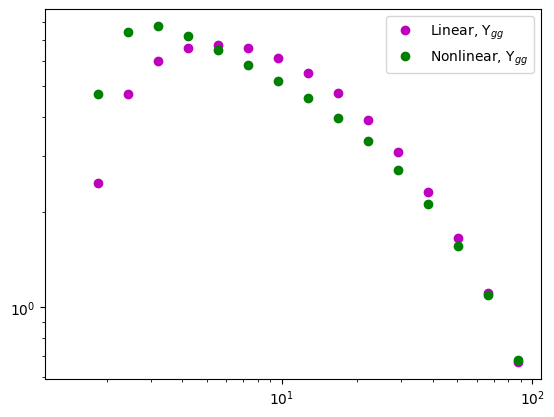

beta, lin= 0.3922268586351628
beta, nl= 0.3922268586351628


In [14]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [15]:
cut_inds_jp = u.linear_scale_cuts_hartlap(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c, covsamps=100)

hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6767676767676768
hartlap= 0.6767676767676768
hartlap= 0.676767676

In [16]:
print("cut indices=", cut_inds_jp)

cut indices= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32]


For joint probes, we disect this to find the elements to cut for individual probes.

In [17]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print(zip(rp_keep_gm, Ups_keep_gm))

cut_indices_gg = [(ind-len(rp_bin_c)) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+len(rp_bin_c) for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print(zip(rp_keep_gg, Ups_keep_gg))

ind_keep_Eg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_Eg]
rp_keep_Eg = rp_bin_c[ind_keep_Eg]
Eg_keep = data_nl_EG[ind_keep_Eg]

Plot the data points this tells us to keep for joint probes (not many)

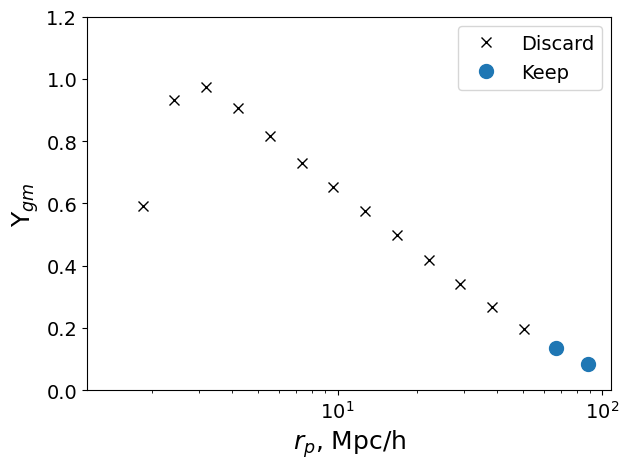

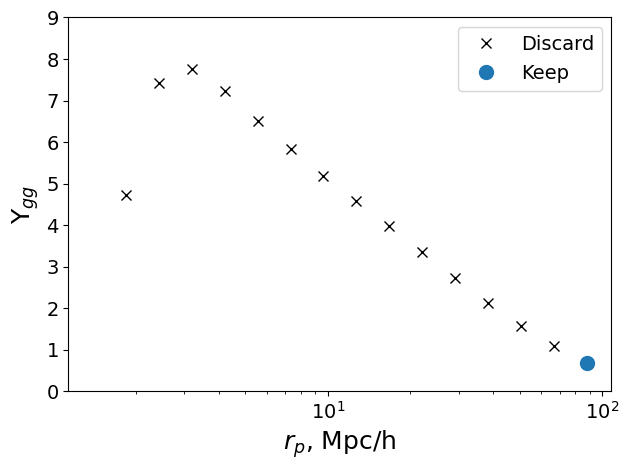

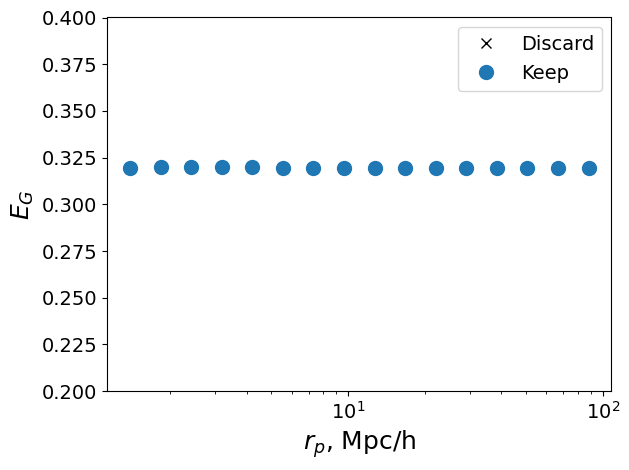

In [18]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gm}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,1.2)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gm_linearscales_fRgravity_wHartlap.pdf')
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gg}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,9)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gg_linearscales_fRgravity_wHartlap.pdf')
plt.show()
#plt.savefig('../plots/Upsilon_gg_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_EG, 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_Eg, Eg_keep, 'o', markersize='10', label='Keep')
plt.ylabel('$E_G$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.ylim(0.2,0.4)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('../plots/EG_linearscales_fRgravity_wHartlap.pdf')
plt.show()

## nDGP case

In [19]:
# Get linear datavector
data_lin_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=False, MG=True, MGtheory='nDGP')

getting Upgg
getting Upgm
maxchi= 6669.353003473356


In [20]:
# Get nonlinear datavector
data_nl_EG = fid.E_G(params, rp_bin_edges, rp0, lens, src, Pimax, endfilename, nonlin=True, nl_bias=False, MG=True, MGtheory='nDGP')

getting Upgg
in nonlinear nDGP case
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loa

In [29]:
klin, Pk_lin = np.loadtxt('./Pklin_nDGP.dat', unpack=True)
knl, Pk_nl = np.loadtxt('./Pknl_nDGP.dat', unpack=True)

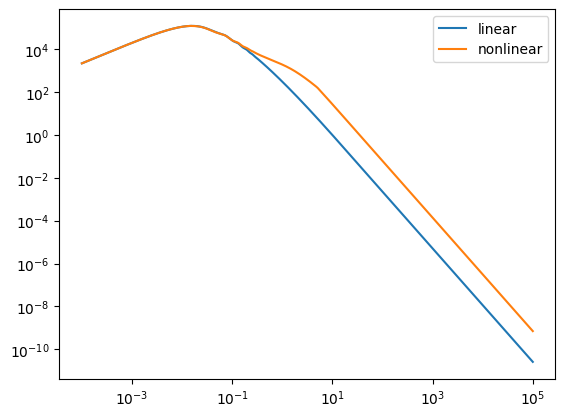

In [30]:
plt.figure()
plt.loglog(klin, Pk_lin, label='linear')
plt.loglog(knl, Pk_nl, label='nonlinear')
plt.legend()
plt.show()

In [21]:
cut_inds_Eg = u.linear_scale_cuts_hartlap(data_nl_EG, data_lin_EG, Dcov_eg, rp_bin_c, covsamps=100)

chi2_in= 0.00042088408091936925 , no cuts


In [22]:
print("cut indices=", cut_inds_Eg)

cut indices= []


In [23]:
data_lin_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = False, MG=True, MGtheory='nDGP')
data_nl_jp = fid.jp_datavector(params, rp_bin_edges, rp0, lens,src, Pimax, endfilename, nonlin = True, nl_bias=False, MG=True, MGtheory='nDGP')

maxchi= 6669.353003473356
in nonlinear nDGP case
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and related data
Loading model and rel

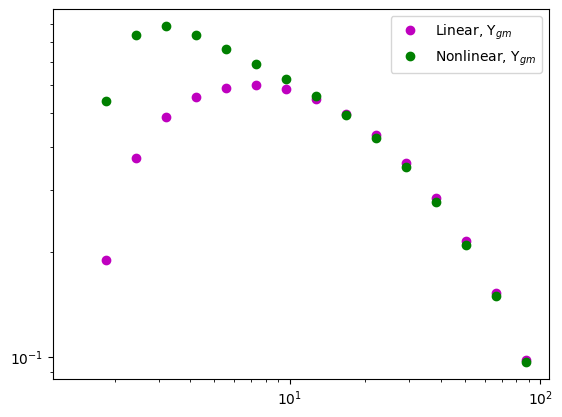

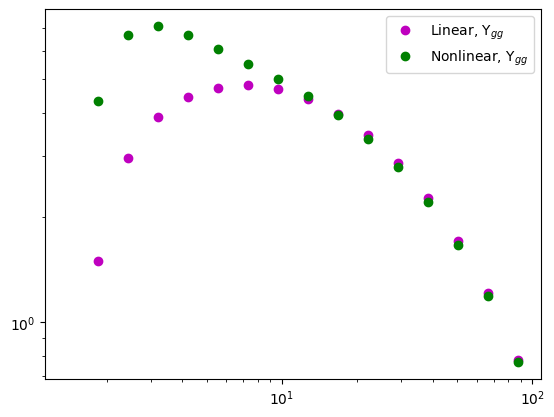

beta, lin= 0.36126963706104503
beta, nl= 0.36126963706104503


In [24]:
plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[0:len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gm}$')
plt.loglog(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gm}$')
plt.legend()
plt.show()

plt.figure()
plt.loglog(rp_bin_c, data_lin_jp[len(rp_bin_c):2*len(rp_bin_c)], 'mo', label='Linear, $\\Upsilon_{gg}$')
plt.loglog(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'go', label='Nonlinear, $\\Upsilon_{gg}$')
plt.legend()
plt.show()

# Check that beta is the same in the linear or nonlinear case
print("beta, lin=", data_lin_jp[-1])
print("beta, nl=", data_nl_jp[-1])

In [25]:
cut_inds_jp = u.linear_scale_cuts_hartlap(data_nl_jp, data_lin_jp, Dcov_jp, rp_bin_c, covsamps=100)

hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6666666666666666
hartlap= 0.6767676767676768
hartlap= 0.6767676767676768
hartlap= 0.676767676

In [26]:
cut_indices_gm = [ind for ind in cut_inds_jp if ind<len(rp_bin_c)]
ind_keep_gm = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gm]
rp_keep_gm = rp_bin_c[ind_keep_gm]
Ups_keep_gm = data_nl_jp[ind_keep_gm]
print(zip(rp_keep_gm, Ups_keep_gm))

cut_indices_gg = [(ind-len(rp_bin_c)) for ind in cut_inds_jp if ind>=len(rp_bin_c)]
ind_keep_gg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
ind_keep_gg_dvec = [ind+len(rp_bin_c) for ind in range(0,len(rp_bin_c)) if ind not in cut_indices_gg]
rp_keep_gg = rp_bin_c[ind_keep_gg]
Ups_keep_gg = data_nl_jp[ind_keep_gg_dvec]
print(zip(rp_keep_gg, Ups_keep_gg))

ind_keep_Eg = [ind for ind in range(0,len(rp_bin_c)) if ind not in cut_inds_Eg]
rp_keep_Eg = rp_bin_c[ind_keep_Eg]
Eg_keep = data_nl_EG[ind_keep_Eg]

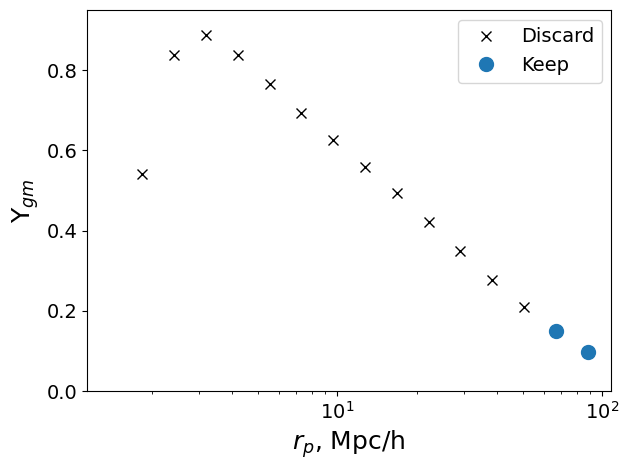

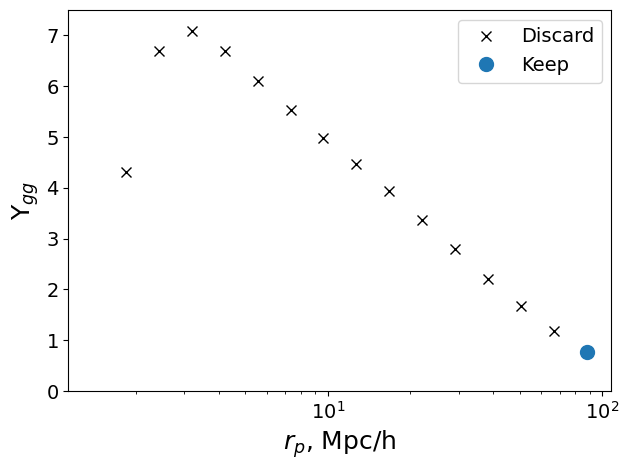

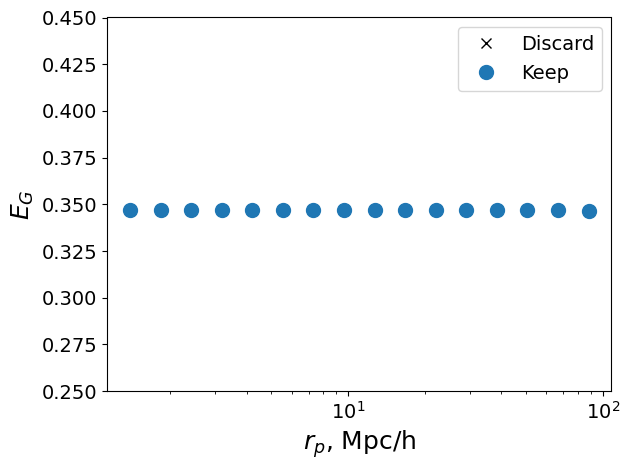

In [27]:
plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[0:len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gm, Ups_keep_gm, 'o', markersize='10', label='Keep')
plt.ylabel('$\\Upsilon_{gm}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,0.95)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gm_linearscales_nDGPgravity_wHartlap.pdf')
plt.show()

plt.figure()
plt.semilogx(rp_bin_c, data_nl_jp[len(rp_bin_c):2*len(rp_bin_c)], 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_gg, Ups_keep_gg, 'o', markersize='10',label='Keep')
plt.ylabel('$\\Upsilon_{gg}$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.ylim(0,7.5)
plt.tight_layout()
#plt.savefig('../plots/Upsilon_gg_linearscales_nDGPgravity_wHartlap.pdf')
plt.show()
#plt.savefig('../plots/Upsilon_gg_scales.png')

plt.figure()
plt.semilogx(rp_bin_c, data_nl_EG, 'kx', markersize='7',label='Discard')
plt.semilogx(rp_keep_Eg, Eg_keep, 'o', markersize='10',label='Keep')
plt.ylabel('$E_G$',fontsize=18)
plt.xlabel('$r_p$, Mpc/h',fontsize=18)
plt.ylim(0.25,0.45)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
#plt.savefig('../plots/EG_linearscales_nDGPgravity_wHartlap.pdf')
plt.show()

In [12]:
# Check if the v1 version of the scale cuts actually does give a chi2<=1 when doing the cut more properly.

cut_EG_cov = np.delete(np.delete(Dcov_eg, cut_inds_Eg,axis=0),cut_inds_Eg,axis=1)
cut_EG_invcov = np.linalg.pinv(cut_EG_cov)
print('cut_EG_invcov=', cut_EG_invcov)
Eg_keep_lin = data_lin_EG[ind_keep_Eg]
delta_keep = Eg_keep - Eg_keep_lin
print('delta keep=', delta_keep)

chi2_eg_proper = np.dot(delta_keep, np.dot(cut_EG_invcov, delta_keep))
print('chi2 with v1 cut=', chi2_eg_proper)

NameError: name 'cut_inds_Eg' is not defined

Why does the nonlinear dip below the linear at intermediate scales? Edit: Figured this out, it's a physical feature due to the nonlinear impact from void growth at intermediate scales, see HMCode-2020 paper.

In [ ]:
wgg_lin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = False)
wgg_nonlin = fid.wgg(params, rp_bin_c, lens, Pimax, endfilename, nonlin = True)

In [ ]:
plt.figure()
plt.loglog(rp_bin_c, wgg_lin, 'mo', label='Linear, $w_{gg}$')
plt.loglog(rp_bin_c, wgg_nonlin, 'go', label='Nonlinear, $w_{gg}$')
plt.legend()
plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
k_lin, Pkgg_lin = np.loadtxt('../txtfiles/Pkgg_nonlin=False.dat', unpack=True)
k_nl, Pkgg_nl = np.loadtxt('../txtfiles/Pkgg_nonlin=True.dat', unpack=True)

In [ ]:
plt.figure()
plt.loglog(k_lin, Pkgg_lin, 'm', label='Linear$')
plt.loglog(k_nl, Pkgg_nl, 'g', label='Nonlinear')
plt.xlim(10**(-3), 10**(-1))
plt.ylim(10**4, 5*10**5)
plt.legend()
#plt.savefig('../plots/wgg_lin_vs_nonlin_1000_Pimax200.pdf')
plt.show()

In [ ]:
plt.figure()
plt.semilogx(k_lin, Pkgg_nl/Pkgg_lin)
plt.ylim(0.9,1.1)
plt.show()